In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import random as rnd

from keras.layers import Dense, Dropout, Flatten
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.callbacks import EarlyStopping
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import regularizers
import random as rnd
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!git clone https://github.com/malborroni/Emojis-from-emotions.git

fatal: destination path 'Emojis-from-emotions' already exists and is not an empty directory.


In [0]:
def model_plot(history):
    plt.figure(figsize = (15, 5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()

    plt.figure(figsize = (15, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc = 'upper left')
    plt.show()

## Data @ale

In [0]:
cd '/content/Emojis-from-emotions/images/ale'

/content/Emojis-from-emotions/images/ale


In [5]:
cd '/content/gdrive/My Drive/Colab Notebooks/AML/ale'

/content/gdrive/My Drive/Colab Notebooks/AML/ale


In [12]:
imgs_ale = []
label_ale = []
for label in os.listdir():
  for image in os.listdir(label):
    imgs_ale.append(cv.imread(os.path.join(label, image)))
    label_ale.append(label)


imgs_ale = np.array(imgs_ale)
label_ale = np.array(label_ale)

imgs_ale.shape, label_ale.shape

((767, 224, 224, 3), (767,))

In [0]:
imgs_ale_224 = []
for im in imgs_ale:
  imgs_ale_224.append(cv.resize(im, (224, 224)))

In [0]:
imgs_ale_224 = np.array(imgs_ale_224)

In [0]:
imgs_ale_224.shape, label_ale.shape

((770, 224, 224, 3), (770,))

In [0]:
idx = np.random.permutation(len(imgs_ale))
label_ale = label_ale[idx]
imgs_ale = imgs_ale[idx]

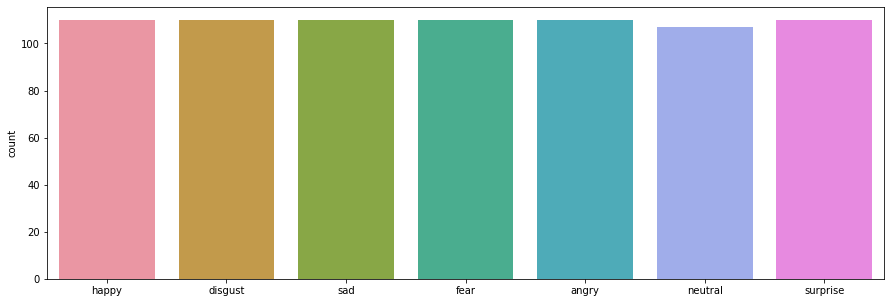

In [14]:
import seaborn as sns
from matplotlib import style
style.use('seaborn-pastel')
plt.figure(figsize = (15,5))
sns.countplot(label_ale)

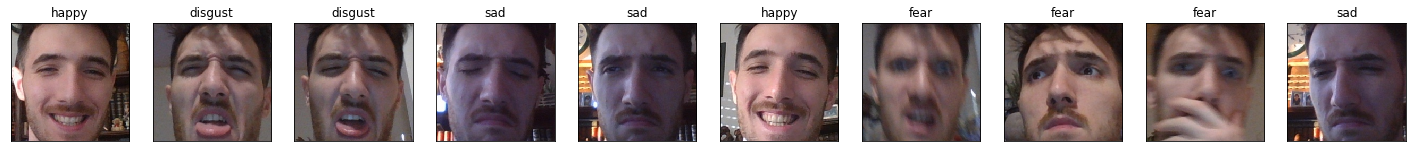

In [15]:
plt.figure(figsize=(25, 8))
nimages = 10 
for i in range(nimages):
    ax = plt.subplot(2, nimages, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #l = rnd.randint(0, len(label))
    plt.imshow(cv.cvtColor(imgs_ale[i], cv.COLOR_BGR2RGB))
    plt.title(str(label_ale[i]))

In [0]:
x_train, imgs_test, y_train, y_test = train_test_split(imgs_ale, label_ale, test_size = .2, random_state = 42, stratify = label_ale)

In [0]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#y_test = lb.fit_transform(y_test)
y_train = to_categorical(y_train, num_classes = 7)
#y_test = to_categorical(y_test, num_classes = 7)

## Data fer 2013

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/AML/icml_face_data.csv')

In [0]:
def sampling_k_elements(group, k=1000):
    if len(group) < k:
        return group
    return group.sample(k)

balanced = data.groupby('emotion').apply(sampling_k_elements).reset_index(drop=True)
del data

In [0]:
imgs = [np.asarray(im.split(), dtype=np.uint8).reshape(48,48) for im in balanced[' pixels']] # from str to float pixel

dic = {0:'angry',
       1:'disgust',
       2:'fear',
       3:'happy',
       4:'sad',
       5:'surprise', 
       6:'neutral'}

label=balanced['emotion'].replace(dic).to_numpy()
del balanced

In [0]:
len(imgs), len(label)

(6547, 6547)

In [0]:
idx = np.random.permutation(len(imgs))
imgs = np.array(imgs)
label = label[idx]
imgs = imgs[idx]


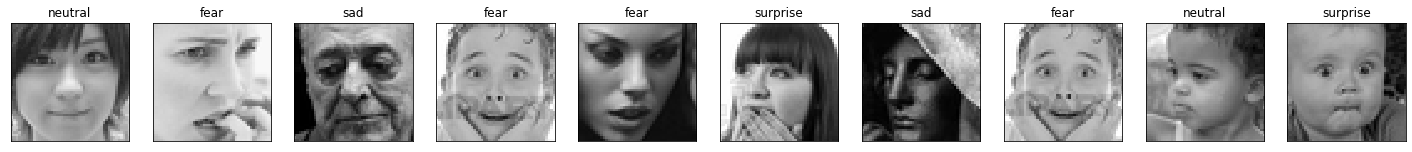

In [0]:
plt.figure(figsize=(25, 8))
nimages = 10 
for i in range(nimages):
    ax = plt.subplot(2, nimages, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    l = rnd.randint(0, len(label))
    plt.imshow(cv.cvtColor(imgs[l], cv.COLOR_BGR2RGB))
    plt.title(str(label[l]))

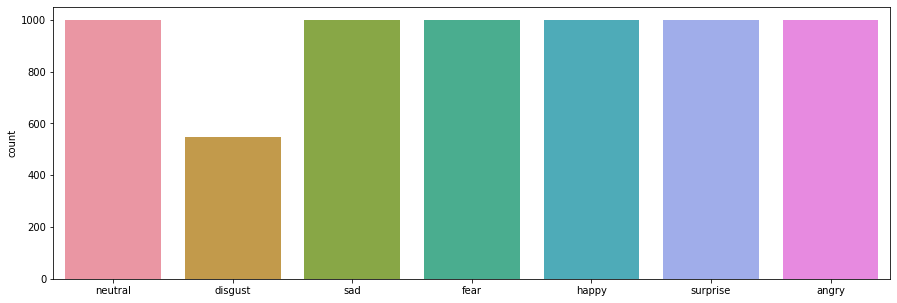

In [0]:
import seaborn as sns
from matplotlib import style
style.use('seaborn-pastel')
plt.figure(figsize = (15,5))
sns.countplot(label)

In [0]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [0]:
imgs = np.array(imgs)
imgs = np.stack((imgs,)*3, axis=-1)
imgs.shape, label.shape

((6547, 48, 48, 3), (6547,))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(imgs, label, test_size = .25, random_state = 42)

In [0]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#y_test = lb.fit_transform(y_test)
y_train = to_categorical(y_train, num_classes = 7)
#y_test = to_categorical(y_test, num_classes = 7)

## Resnet50


In [0]:
imgs_197 = []
for im in imgs:
  imgs_197.append(cv.resize(im, (224, 224)))
imgs_197 = np.array(imgs_197)
imgs_197.shape
imgs_197 = np.stack((imgs_197,)*3, axis=-1)
imgs_197.shape, label.shape

((6547, 224, 224, 3), (6547,))

In [0]:
x_train, imgs_test, y_train, y_test = train_test_split(imgs_197, label, test_size = .25, random_state = 42)

In [0]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(imgs_test)

In [0]:
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)

In [0]:
np.max(x_train), np.min(x_train), x_train.shape, np.max(x_test), np.min(x_test), x_test.shape

(151.061, -123.68, (4910, 224, 224, 3), 151.061, -123.68, (1637, 224, 224, 3))

In [0]:
base_model = ResNet50(weights = 'imagenet', include_top = False, pooling = 'avg', input_shape = (224, 224, 3))













94658560/94653016 [==============================] - 3s 0us/step


In [0]:
count = 1
nlayer_stop = 150
for layer in base_model.layers:
  if count <= nlayer_stop:
    count += 1
    layer.trainable = False
  else:
    break

In [0]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
model = Sequential()
model.add(base_model)
model.add(Dense(2048, activation = 'relu'))#, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(1024, activation = 'relu'))#, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(512, activation = 'relu'))#, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, min_delta=0.01)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
history_resnet50 = model.fit(x_train, y_train, epochs = 20, validation_split=0.25, verbose = 1, batch_size = 512)#, callbacks = [es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20186 samples, validate on 6729 samples
Epoch 1/20
20186/20186 [==============================] - 14s 684us/step - loss: 1.9475 - acc: 0.2484 - val_loss: 1.8387 - val_acc: 0.2512
Epoch 2/20
20186/20186 [==============================] - 6s 285us/step - loss: 1.6016 - acc: 0.3753 - val_loss: 1.7413 - val_acc: 0.2962
Epoch 3/20
20186/20186 [==============================] - 6s 286us/step - loss: 1.3541 - acc: 0.4883 - val_loss: 6.7290 - val_acc: 0.1412
Epoch 4/20
20186/20186 [==============================] - 6s 286us/step - loss: 1.0576 - acc: 0.6095 - val_loss: 2.2328 - val_acc: 0.2888
Epoch 5/20
20186/20186 [==============================] - 6s 290us/step - loss: 0.7623 - acc: 0.7379 - val_loss: 2.3430 - val_acc: 0.2302
Epoch 6/20
20186/20186 [==============================] - 6s 285us/step - loss: 0.5097 - acc: 0.8294 - val_loss: 3.1626 - val_acc: 0.3316
Epoch 7/20
20186/20186 [==

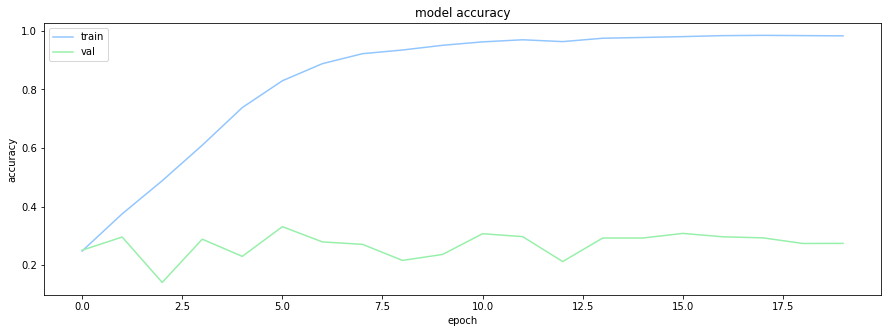

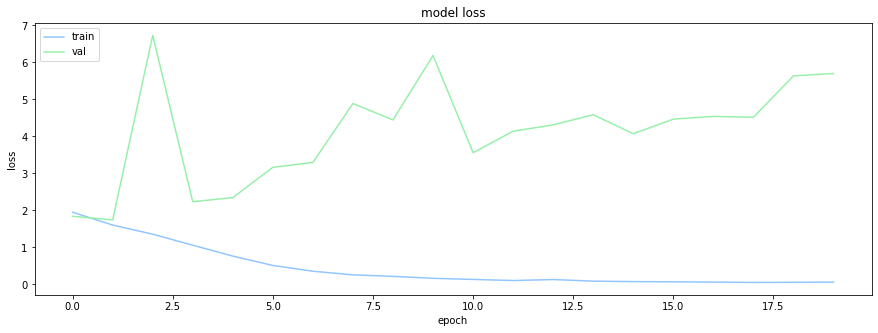

In [0]:
model_plot(history_resnet50)

In [0]:
predicted = model.predict(x_test)
y_pred = np.argmax(predicted, axis = 1)
lab = []
for i in y_pred:
    if i == 0:
        lab.append('angry')
    elif i == 1:
        lab.append('disgust')
    elif i == 2:
        lab.append('fear')
    elif i == 3:
        lab.append('happy')
    elif i == 4:
        lab.append('sad')
    elif i == 5:
        lab.append('surprise')
    elif i == 6:
        lab.append('neutral')
print(classification_report(y_test, lab, digits = 3))

              precision    recall  f1-score   support

       angry      0.179     0.278     0.218      1235
     disgust      0.000     0.000     0.000       130
        fear      0.210     0.190     0.199      1304
       happy      0.418     0.258     0.319      2248
     neutral      0.159     0.282     0.203      1566
         sad      0.187     0.145     0.164      1499
    surprise      0.052     0.028     0.037       990

    accuracy                          0.207      8972
   macro avg      0.172     0.169     0.163      8972
weighted avg      0.225     0.207     0.206      8972



## VGGFACE

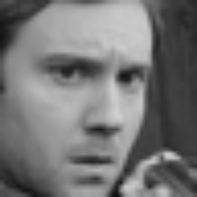

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv.resize(imgs[0], (197,197)))

In [18]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-ll5qk546
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-ll5qk546
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=2c917e491132e89d2faeeec0a4504e13a8294ff91f32f0b8e63c212c13a5f946
  Stored in directory: /tmp/pip-ephem-wheel-cache-n3t8q6y3/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [0]:
imgs_197 = []
for im in imgs_ale:
  imgs_197.append(cv.resize(im, (224, 224)))

In [0]:
del imgs

In [0]:
imgs_197 = np.array(imgs_197)
imgs_197.shape

(770, 224, 224, 3)

In [0]:
imgs_197 = imgs_197.astype('float64')

In [0]:
imgs_197 = np.stack((imgs_197,)*3, axis=-1)
imgs_197.shape, label.shape

((9547, 224, 224, 3), (9547,))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(imgs_197, label_ale, test_size = .2, random_state = 42, stratify=label_ale)

In [0]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [0]:
del imgs_197, label

In [0]:
x_train = x_train.astype('float64')
x_test = imgs_test.astype('float64')
x_train = preprocess_input(x_train, version=2)
x_test = preprocess_input(x_test, version=2)

In [0]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#y_test = lb.fit_transform(y_test)
y_train = to_categorical(y_train, num_classes = 7)
#y_test = to_categorical(y_test, num_classes = 7)

In [22]:
np.max(x_train), np.min(x_train), x_train.shape, np.max(x_test), np.min(x_test), x_test.shape

(163.5047,
 -131.0912,
 (613, 224, 224, 3),
 163.5047,
 -131.0912,
 (154, 224, 224, 3))

In [0]:
base_model = VGGFace(include_top = False, input_shape = (224, 224, 3), model='senet50')

In [24]:
len(base_model.layers)

286

In [0]:
count = 1
nlayer_stop = 24
for layer in base_model.layers:
  if count <= nlayer_stop:
    count += 1
    layer.trainable = False
  else:
    break

In [26]:
base_model.summary()

Model: "vggface_senet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________

In [27]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l1(0.01)))
model.add(Dropout(.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, min_delta=0.01)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [28]:
history_vggface = model.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 1, batch_size = 128)#, callbacks = [es])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 490 samples, validate on 123 samples
Epoch 1/100
490/490 [==============================] - 18s 36ms/step - loss: 17.0696 - acc: 0.1449 - val_loss: 25.9065 - val_acc: 0.2033
Epoch 2/100
490/490 [==============================] - 2s 4ms/step - loss: 15.1477 - acc: 0.1776 - val_loss: 25.4700 - val_acc: 0.2033
Epoch 3/100
490/490 [==============================] - 2s 4ms/step - loss: 14.4477 - acc: 0.2265 - val_loss: 26.3967 - val_acc: 0.1138
Epoch 4/100
490/490 [==============================] - 2s 4ms/step - loss: 13.9392 - acc: 0.2224 - val_loss: 24.4083 - val_acc: 0.2033
Epoch 5/100
490/490 [==============================] - 2s 4ms/step - loss: 13.2212 - acc: 0.2673 - val_loss: 23.8522 - val_acc: 0.2033
Epoch 6/100
490/490 [==============================] - 2s 4ms/step - loss: 12.4993 - acc: 0.3204 - val_loss: 23.2997 - val_acc: 0.2033
Epoch 7/100
490/490 [=========================

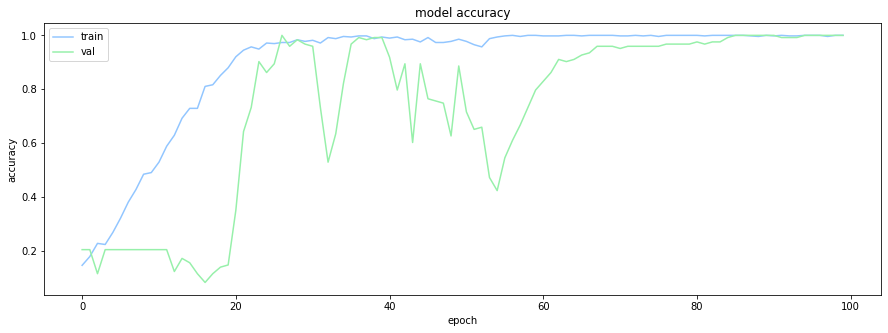

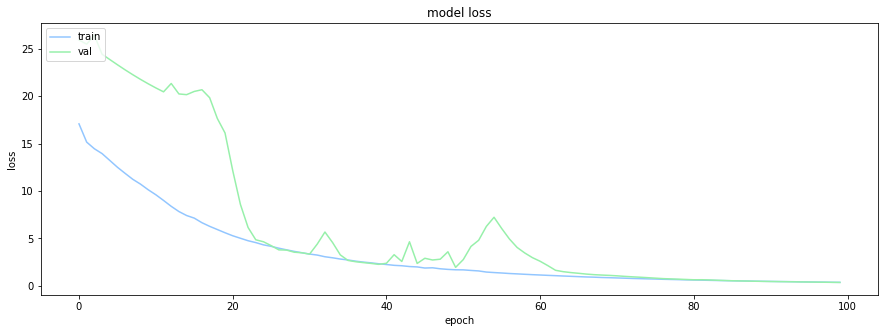

In [29]:
model_plot(history_vggface)

In [34]:
y_pred

array([3, 0, 3, 4, 2, 1, 6, 4, 4, 1, 0, 6, 2, 2, 5, 5, 4, 0, 0, 1, 1, 5,
       6, 6, 3, 1, 6, 3, 5, 0, 4, 2, 4, 3, 3, 5, 4, 4, 6, 0, 0, 0, 2, 6,
       2, 4, 5, 2, 6, 6, 2, 6, 1, 2, 2, 3, 6, 2, 5, 4, 6, 3, 3, 5, 1, 1,
       5, 3, 2, 6, 5, 1, 0, 5, 0, 5, 4, 6, 1, 1, 1, 0, 6, 2, 1, 1, 5, 4,
       4, 0, 6, 5, 4, 5, 5, 5, 2, 0, 6, 3, 0, 0, 3, 3, 5, 1, 6, 3, 0, 0,
       2, 6, 5, 4, 4, 1, 2, 3, 6, 4, 3, 6, 3, 3, 5, 5, 6, 3, 3, 0, 3, 3,
       2, 6, 2, 2, 2, 3, 0, 2, 1, 4, 0, 0, 4, 4, 4, 5, 1, 1, 1, 1, 4, 2])

In [30]:
predicted = model.predict(x_test)
y_pred = np.argmax(predicted, axis = 1)
lab = []
for i in y_pred:
    if i == 0:
        lab.append('angry')
    elif i == 1:
        lab.append('disgust')
    elif i == 2:
        lab.append('fear')
    elif i == 3:
        lab.append('happy')
    elif i == 4:
        lab.append('sad')
    elif i == 5:
        lab.append('surprise')
    elif i == 6:
        lab.append('neutral')
print(classification_report(y_test, lab, digits = 3))

              precision    recall  f1-score   support

       angry      1.000     0.955     0.977        22
     disgust      1.000     0.955     0.977        22
        fear      0.955     0.955     0.955        22
       happy      0.957     1.000     0.978        22
     neutral      0.000     0.000     0.000        22
         sad      0.000     0.000     0.000        22
    surprise      0.000     0.000     0.000        22

    accuracy                          0.552       154
   macro avg      0.559     0.552     0.555       154
weighted avg      0.559     0.552     0.555       154



In [0]:
etichette = ['angry','disgust','fear','happy','neutral','sad','surprise']

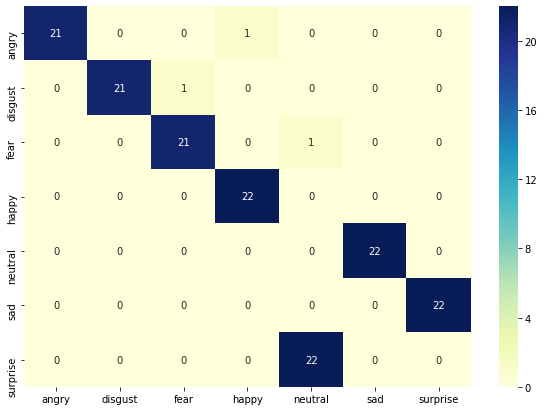

In [32]:
cm = confusion_matrix(y_test, lab)
df_cm = pd.DataFrame(cm, index = etichette, columns = etichette)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")

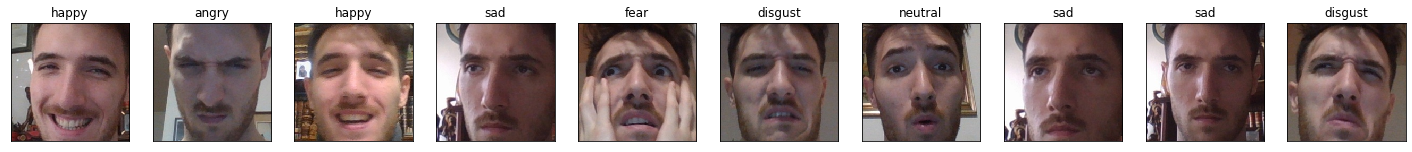

In [35]:
plt.figure(figsize=(25, 8))
nimages = 10 
for i in range(nimages):
    ax = plt.subplot(2, nimages, i + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(cv.cvtColor(imgs_test[i], cv.COLOR_BGR2RGB))
    plt.title(str(lab[i]))

In [0]:
test = np.expand_dims(x_test[0], axis=0)

In [0]:
def extract_features(name_layer, base_model):
  tmp = Model(base_model.input, base_model.get_layer(name = name_layer).output)
  #tmp.summary()
  return tmp

In [0]:
tmp = extract_features(name_layer='conv4_4_3x3/bn', base_model=base_model)

In [0]:
feature_maps = tmp.predict(test)

In [78]:
feature_maps.shape

(1, 14, 14, 256)

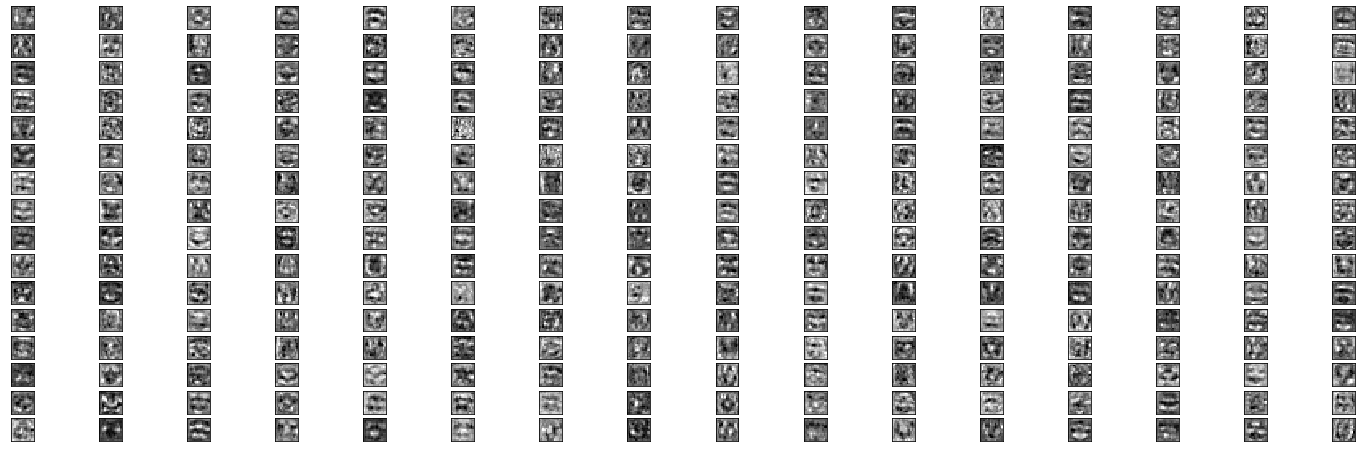

In [79]:
#feature_maps = model.predict(test)
# plot the output from each block
plt.figure(figsize=(25, 8))
square = 16
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[:, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	plt.show()